# XClone tutorials on TNBC1 scRNA-seq

A triple-negative breast cancer (TNBC) sample that was assayed by droplet-based scRNA-seq (10x Genomics), published by [CopyKAT](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8122019/) 
with dataset ID as TNBC1. The aligned reads in BAM format and the called cell list were directly downloaded from GEO [GSE148673](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE14867).
As reported by the original study using CopyKAT, three clusters of cells were identified from the transcriptome, consisting of 300 normal cells and 797 tumour cells from two 
distinct CNV clones.

## Introduction
This tutorial covers how to use XClone for scRNA-seq CNV analysis in RDR module, BAF module and Combine module independently.

Author: Rongting Huang

Date: 2023-03-25

Contact information:
- Email: rthuang@connect.hku.hk
- GitHub: [github.com/Rongting](https://github.com/Rongtingting)

The data used in this tutorial is available in XClone package and can be download from [xclonedata](https://github.com/Rongtingting/xclone-data/tree/main/TNBC1_scRNA).

The data contains:
- Single-cell RNA-seq read count data for XClone RDR module and BAF module.


Requirements

To follow this tutorial, you will need:
- Python 3.7.
- The following Python packages: XClone and its dependent packages, e.g., anndata, numpy, scipy, pandas, scanpy.

In this tutorial, we covered how to use XClone for scRNA CNV analysis. If you have any questions or comments, please feel free to contact the author.

## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
print("scipy", scipy.__version__)

xclone.pp.efficiency_preview()

(Running XClone 0.3.4)
2023-03-25 07:40:50
scipy 1.7.0
[XClone efficiency] multiprocessing cpu total count in your device 112


In [2]:
dataset_name = "TNBC1_scRNA"
## output results dir
outdir = "/storage/yhhuang/users/rthuang/xclone/tutorials/"

To specify the name of your dataset and the output directory where the results will be saved, you can set the `dataset_name` and `outdir` parameters before you start using any module in XClone.
Replace "BCH869_scRNA" with a name of your choice to identify your dataset, and `"/storage/xxxx/users/xxxx/xclone/tutorials/"` with the path to the directory where you want to save the output files.

## Load dataset

For TNBC1 dataset, users can easily load the raw read count matrices for RDR module and BAF module, respectively by `xclone.data.tnbc1_rdr()` and `xclone.data.tnbc1_baf()`.

Users can load the matricesin  anndata object in Python, it typically contains several matrices or tables of data, each with its own set of row and/or column annotations. 
The obs attribute typically contains annotation information for each cell in the dataset, and the var attribute typically contains annotation information for each gene in the dataset. 

obs attribute used in `XClone`:

`cluster`: Cluster identifier for each cell by combining expression with BAF analysis. We annotated the cell clusters into two subclones Clone 1 (Clone A), Clone 2 (Clone B) and Normal cells.

`cluster.pred`: Normal and tumor cells, `'N'` and `'T'` here, from the above mentioned annotation.

`copykat`:  Cluster identifier for each cell by CopyKAT publication.

`copykat.pred`: Normal and tumor cells identified by copyKAT publication.


Additional cell-level annotations can be merged in `obs` by users.

var attribute used in `XClone`:

`GeneName`: Gene Names for each gene in the dataset.

`GeneID`: Identifier or accession number of each gene in the dataset(if available).

`chr`: Chromosome location of each gene.

`start`: Start position of each gene on its chromosome.

`stop`: End position of each gene on its chromosome.

`arm`: Chromosome arm information for each gene.

`chr_arm`: Combined Chromosome and arm information for  each gene.

`band`: Chromosome band information for each gene (if available)..

Additional gene-level annotations can be merged in `var` by users.

For RDR module, there is `raw_expr` layer in the anndata, and for BAF module,  there are two layers `AD` and `DP`, initially.


In [3]:
RDR_adata = xclone.data.tnbc1_rdr()
BAF_adata = xclone.data.tnbc1_baf()

## RDR module

By calling the config method `xclone.XCloneConfig()`, users can create an instance of the `XCloneConfig` class in the `module` of "RDR" to set data-specific configures for RDR module.

In RDR module, specify a `cell_anno_key` with a cell annotation key used in your dataset, and `ref_celltype` as the reference cell type.

Set the output directory by specifying `outdir`.

XClone can defaultly detect and remove celltype-specific marker genes when users specify cell annotation key for `marker_group_anno_key` and N top marker genes in each cell group to be removed by specify the number in  `top_n_marker`, $N=15$ by default. If `marker_group_anno_key` is not defined, `cell_anno_key` will be used by default.

Users can decide to plot the main figures in each module or not by setting `xclone_plot`, True or False. If True, can also select cell annotation term `plot_cell_anno_key` for plotting cells by clusters.

XClone has default start probability for `start_prob` ([0.1, 0.8, 0.1] for copy loss, copy neutral and copy gain) in 10x scRNA-seq dataset.

Before running the RDR moudle, users can use `xconfig.display()` to print all configurations used in RDR module for previewing and logging.

Users can run the analysis on your input data by calling the `run_RDR` method by specifying the `RDR_adata` and `config_file`. 
If no custmoised config file is used, XClone will load the default config file.

Here shows the example of BCH869 RDR module.

RDR 
Configurations:
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/tutorials
_plot_suffix                   
_start                         1679730054.482184
_vector_friendly               True
cell_anno_key                  cluster.pred
dataset_name                   TNBC1_scRNA
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [0.0001, 0.96, 0.99]
marker_group_anno_key          cluster.pred
max_iter                  

Trying to set attribute `.var` of view, copying.


[XClone] use marker genes provided by users: 
 ['AC036214.3' 'AC093484.3' 'AL365205.1' 'ATP1A1' 'B2M' 'CD24' 'CRYAB'
 'CST3' 'CTSB' 'CYBA' 'DPYD' 'EMP3' 'EPCAM' 'GSTO1' 'H3F3A' 'HLA-A' 'HNMT'
 'HSP90AB1' 'KRT7' 'MRPL14' 'POLR1C' 'RAB31' 'RPL28' 'TM4SF1' 'TMSB4X'
 'TOMM6' 'TPD52' 'UBB' 'YIPF3' 'ZEB2']
filter_genes_num: 30
used_genes_num: 6403
output anndata is not sparse matrix.


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 118 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: 3.1872219121269994e+33
min_value: 2.967852820468968e-52
qt_0.95_value: 4.299742553561531
qt_0.05_value: 0.045671615314120464
remove no GLM results genes num: 0
remove inf dispersion genes num: 0
[XClone RDR dispersion]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 2.920260325742404
min_value: 0.014103096362288924
qt_0.95_value: 2.920260325742404
qt_0.05_value: 0.045671615314120464
[XClone hint] RDR_base_file and bulk_file saved in /storage/yhhuang/users/rthuang/xclone/tutorials/data/.
make WMA connectivities matrix, saved in varp[WMA_connect].
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['19q', '3p', '8q']
CNV loss:  0.6554607545645817
CNV neutral:  1.23887172857021
CNV gain:  2.2130882798954556
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.65546075 1.23887173 2.21308828]
expression_br

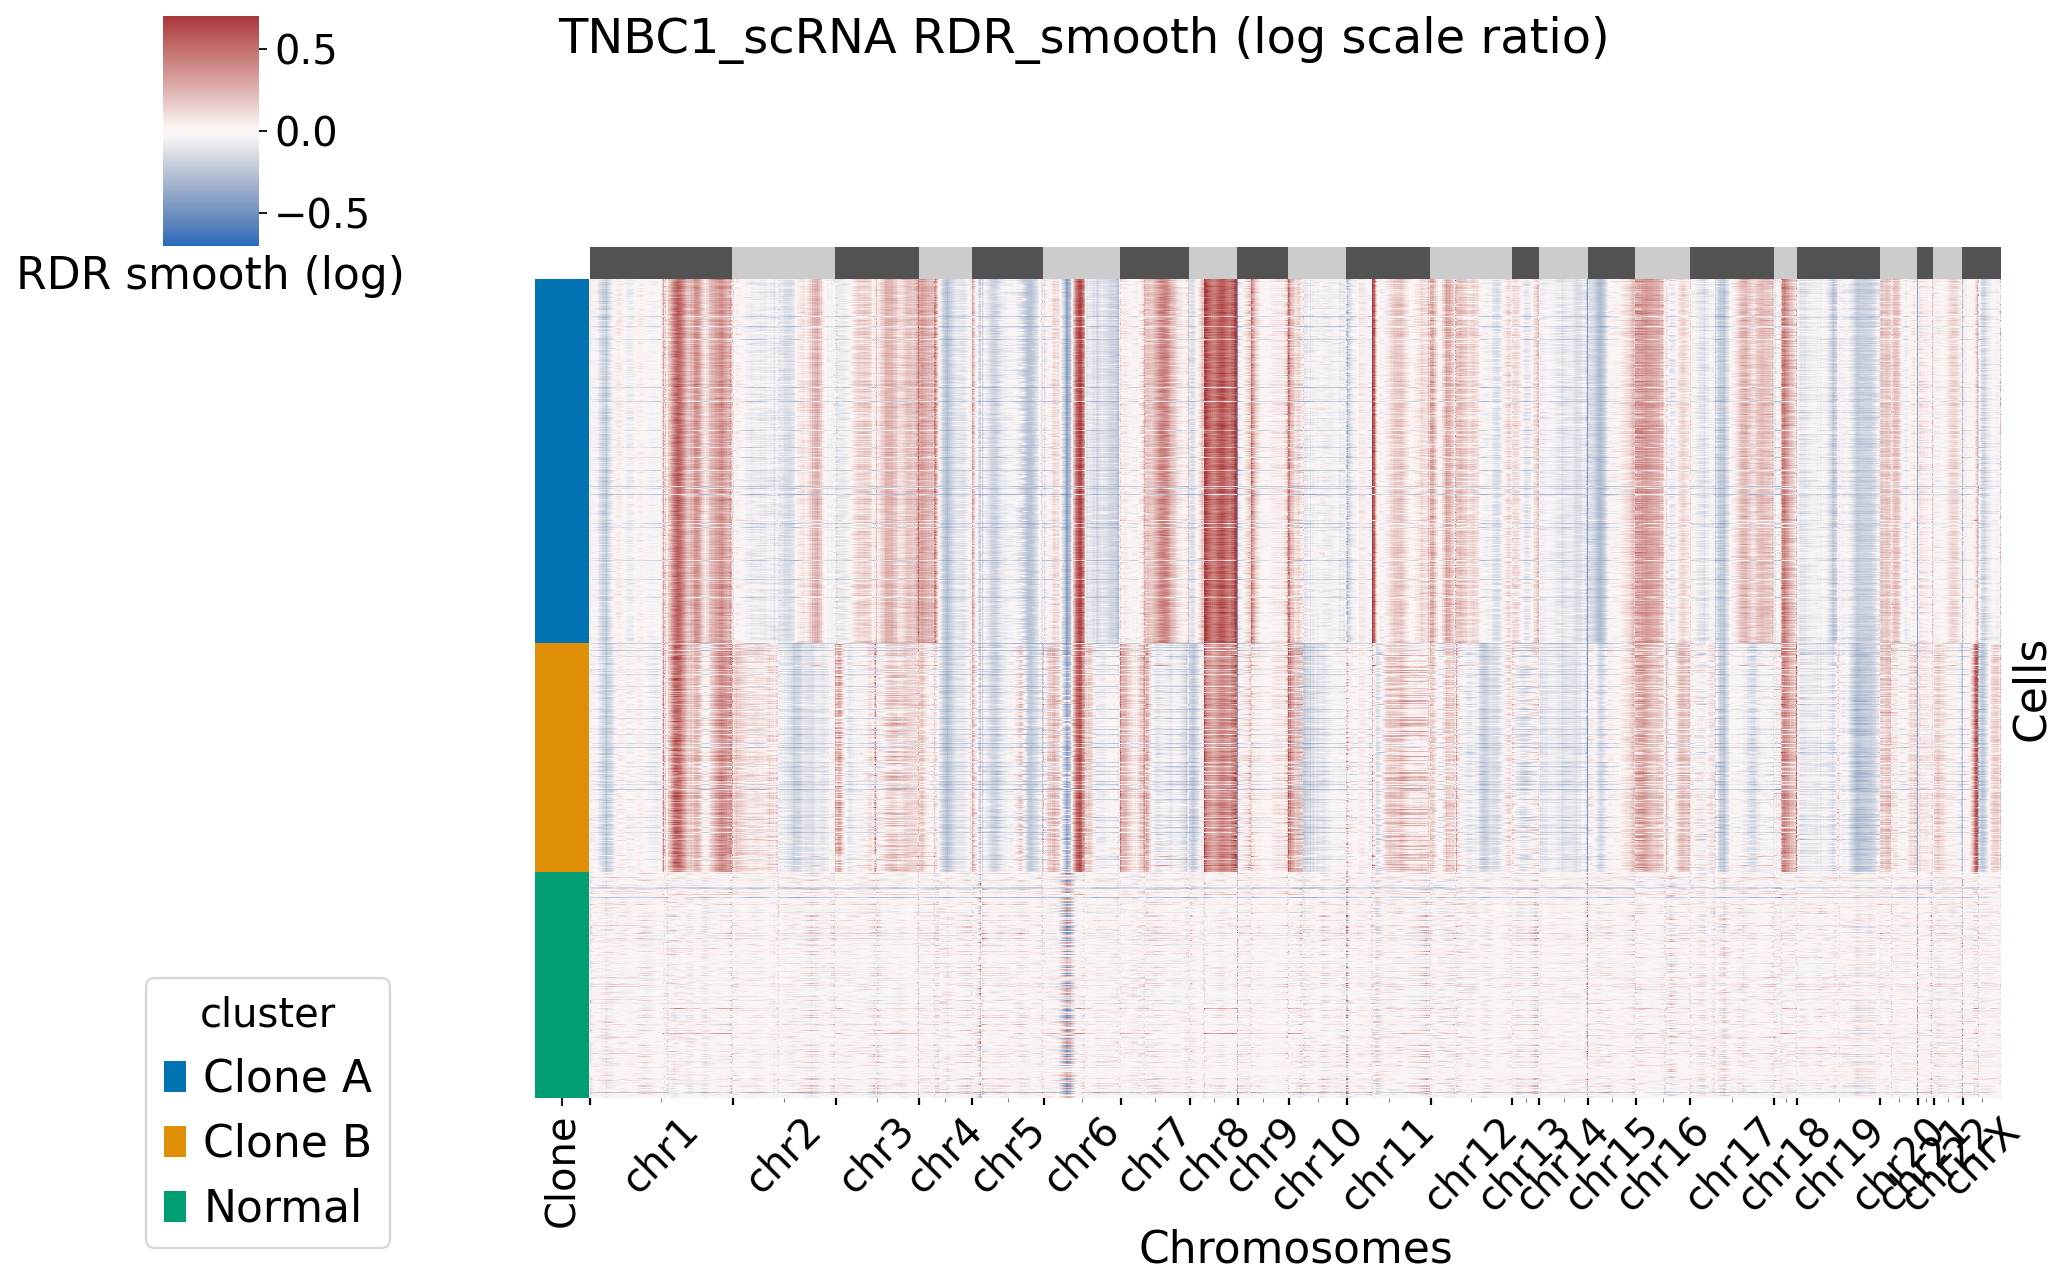

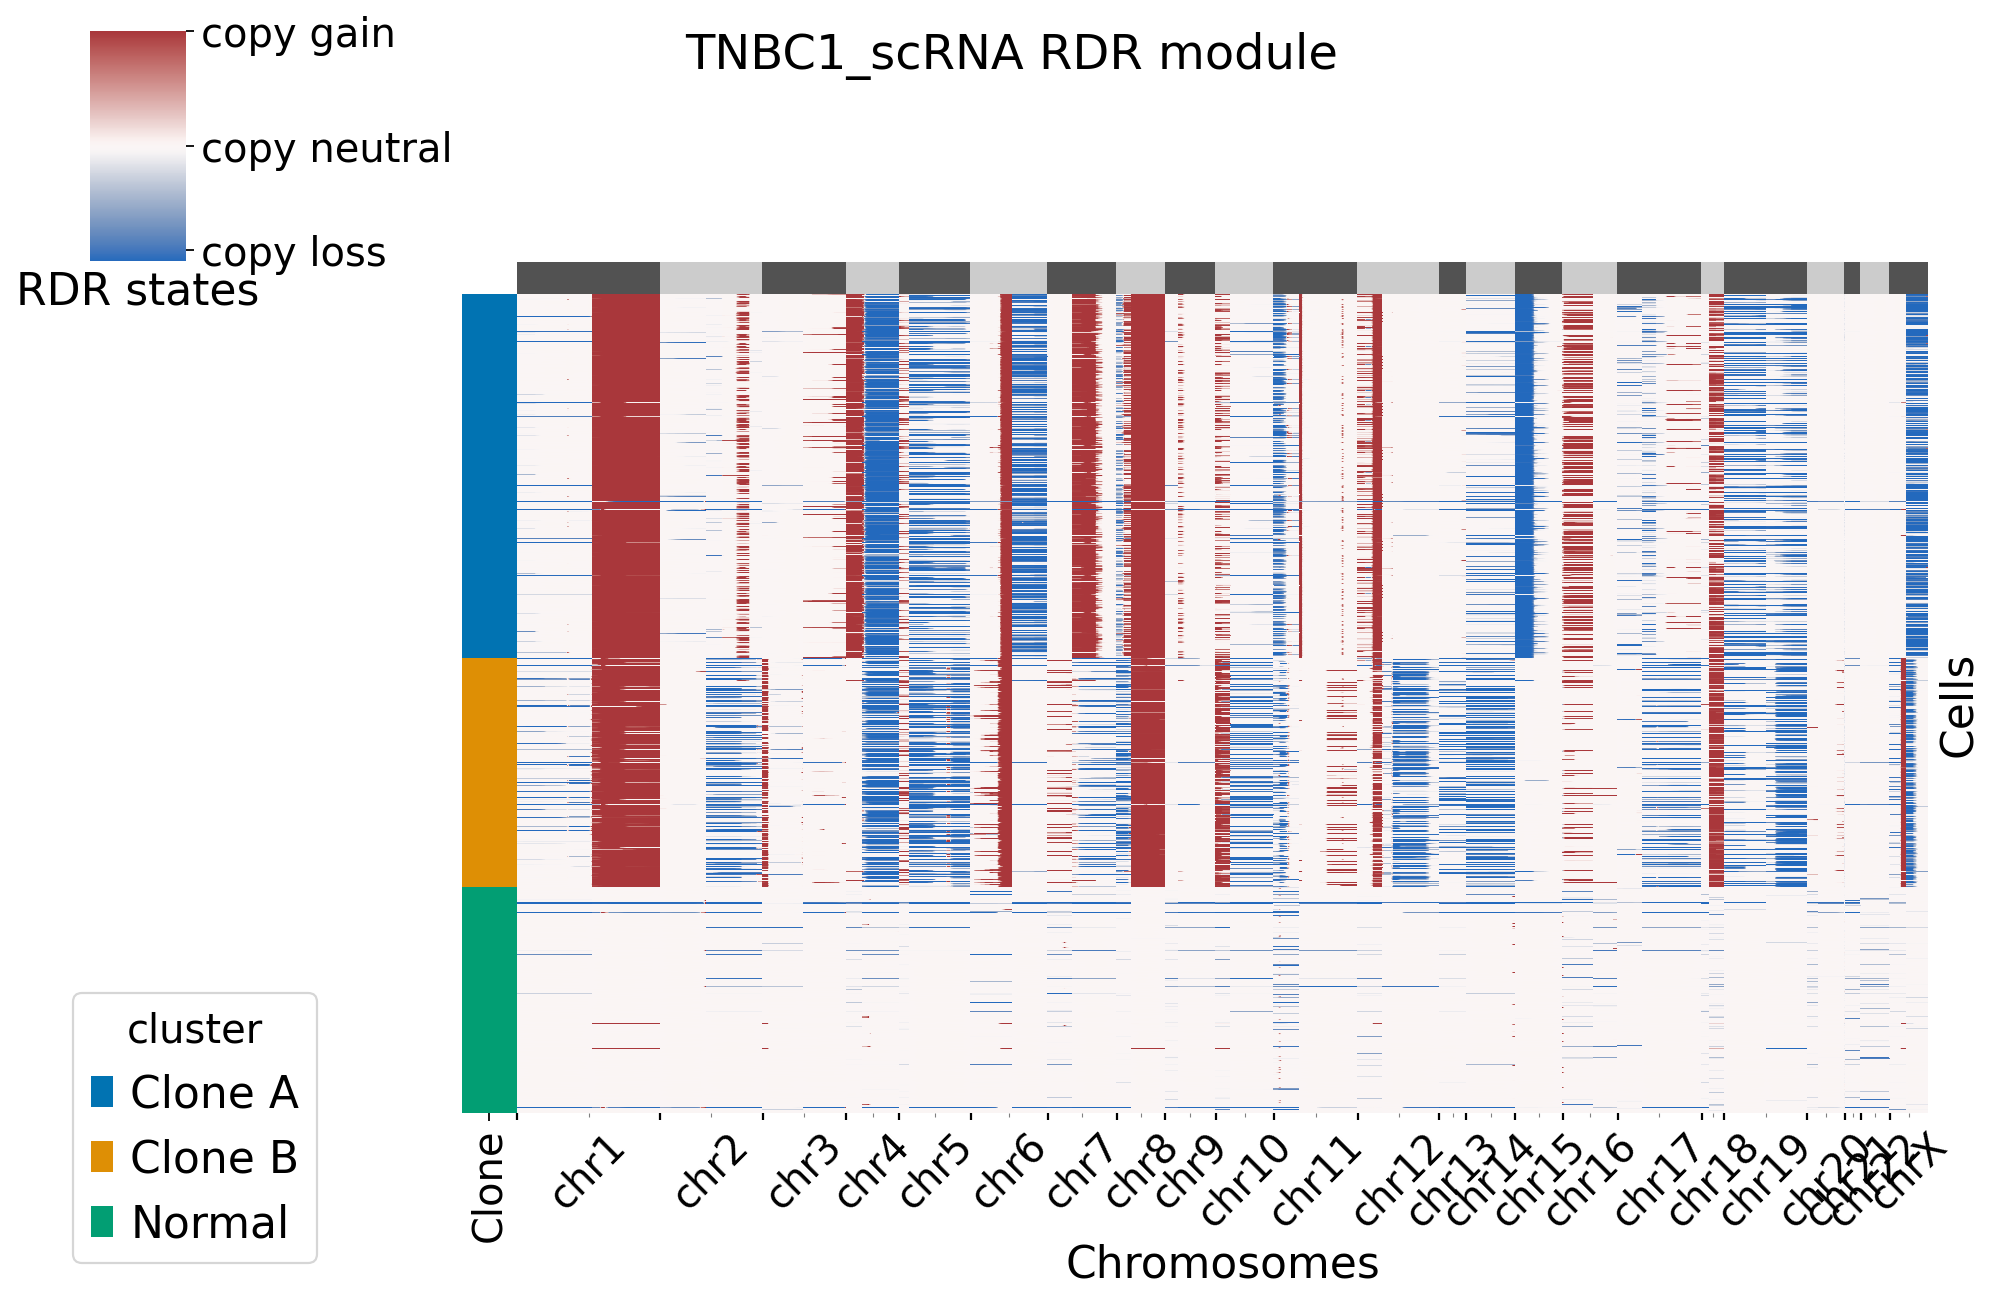

In [4]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = outdir
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.marker_group_anno_key = "cluster.pred"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"
xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

In [5]:
RDR_Xdata

AnnData object with n_obs × n_vars = 1097 × 6402
    obs: 'copykat.pred', 'cluster.pred', 'cluster', 'mit_clone_id', 'confident', 'tumor', 'copykat', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped'
    uns: 'data_mode', 'data_notes', 'genome_mode', 'log', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors', 'chr_dict', 'guide_CNV_chrs_use_layers', 'guide_CNV_chrs_use_anno_key', 'ref_log_expression_brk', 'group_genes', 'CNV_ratio', 'Logliklihood'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected', 'WMA_smoothed', 'RDR_smooth', 'emm_prob_log', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx_log'
    obsp: 'distances', 'connectivities'

In [6]:
RDR_Xdata.layers["posterior_mtx"].shape

(1097, 6402, 3)

In [7]:
RDR_Xdata.layers["posterior_mtx"].argmax(axis=-1).shape

(1097, 6402)

Users can load the step by step results(AnnData) stored in `outdir/data`.

For the final RDR module CNV detection results, load the AnnData object results into memory:

```python
import anndata
filename = outdir+"data/RDR_adata_KNN_HMM_post.h5ad"
adata = anndata.read_h5ad(filename)
```

Access the posterior_mtx layer:
```python
cnv_prob = adata.layers["posterior_mtx"]
```
This will extract the final CNV calling results as a NumPy array.

The posterior_mtx layer contains the posterior probabilities of each cell  at each genomic segment(gene scale default) having each copy number state. 
The rows correspond to cells and the columns correspond to genomic segments.

```python
copy_states = cnv_prob.argmax(axis=-1)
```
This will give you a 2D numpy array hard assigned CNV states for each cell each gene.

For more to explore the results of XClone, pls refer to [link](link).

## BAF moudle

Similarly, by calling the config method `xclone.XCloneConfig()`, users can create an instance of the `XCloneConfig` class in the `module` of "BAF" to set data-specific configures for BAF module.

It is default set `baf_bias_mode=1`, which supports $K=5$ BAF states: allele A bias (++), allele A bias (+), allele balance, allele B bias (+), and allele B bias (++). XClone provides $K=3$ BAF states for comparasion (visualization). In this mode, `CNV_N_components` is 5.
Alternatively, users can specify another mode by setting `baf_bias_mode=0`, which supports $K=3$ BAF states: allele A bias,allele balance, allele B bias.  In this mode, `CNV_N_components` is 3.

In BAF module, the start probability`start_prob` is default set as  $[0.3, 0.4, 0.3]$ and $[0.2,  0.15, 0.3,  0.15, 0.2]$ for $K=3$ and $K=5$, respectively. And the transition probability `trans_prob` for HMM smoothing is default set as $\{t = 1e-6$, $1-(K-1)t\}$ respectively for cross-state transition and state keeping.
If users change  `CNV_N_components` manually, should also consider the correspoding start probability and transition probability in HMM settings.

Generaly, users need specify a `cell_anno_key` with a cell annotation key used in your dataset, and `ref_celltype` as the reference cell type.

Set the output directory by specifying `outdir`.

Generaly, data-specific theoractical B allele frequency is fitted from the reference cells. However, if the reference cells is limited, users can set `theo_neutral_BAF=0.5` directly. 
Here we use default setting in TNBC1 dataset. 

Users can decide to plot the main figures in each module or not by setting `xclone_plot`, True or False. If True, can also select cell annotation term `plot_cell_anno_key` for plotting cells by clusters. XClone perform the denoise strategy in BAF module and plot the denoised BAF CNV profile by default.

Before running the BAF moudle, users can use `xconfig.display()` to print all configurations used in RDR module for previewing and logging.

Users can run the analysis on your input data by calling the `run_BAF` method by specifying the `BAF_adata` and `config_file`. 
If no custmoised config file is used, XClone will load the default config file.

Here shows the example of BCH869 BAF module.

BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
CNV_N_components               5
KNN_neighbors                  10
RDR_file                       None
WMA_smooth_key                 chr_arm
WMA_window_size                101
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/tutorials
_plot_suffix                   
_start                         1679730605.4942553
_vector_friendly               True
baf_bias_mode                  1
bin_nproc                      20
cell_anno_key                  cluster.pred
concentration                  100
concentration_lower            20
concentration_upper            100
dataset_name                   TNBC1_scRNA
exclude_XY                     False
extreme_count_cap              False
feature_mode                   GENE
file_format_data               h5ad
file_format_figs      

... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


[XClone hint] BAF_base_file and merged_file saved in /storage/yhhuang/users/rthuang/xclone/tutorials/data/.
[XClone get_CNV_states] time_used: 95.57seconds
correct RDR CNV guiding copy loss-B ratio
states used: [0.24059262 0.3962636  0.50714286 0.63970433 0.85      ]
.....
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 2 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 0.82seconds
Cell level: no filtering emm_prob
Gene level: no filtering emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 7 seconds
[XClone get_CNV_states] time_used: 65.22seconds
states used: [0.28692468 0.50714286 0.72361922]
.....
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 1 seconds
normalize the input emm_prob_log
normalized emm_prob_log
genera

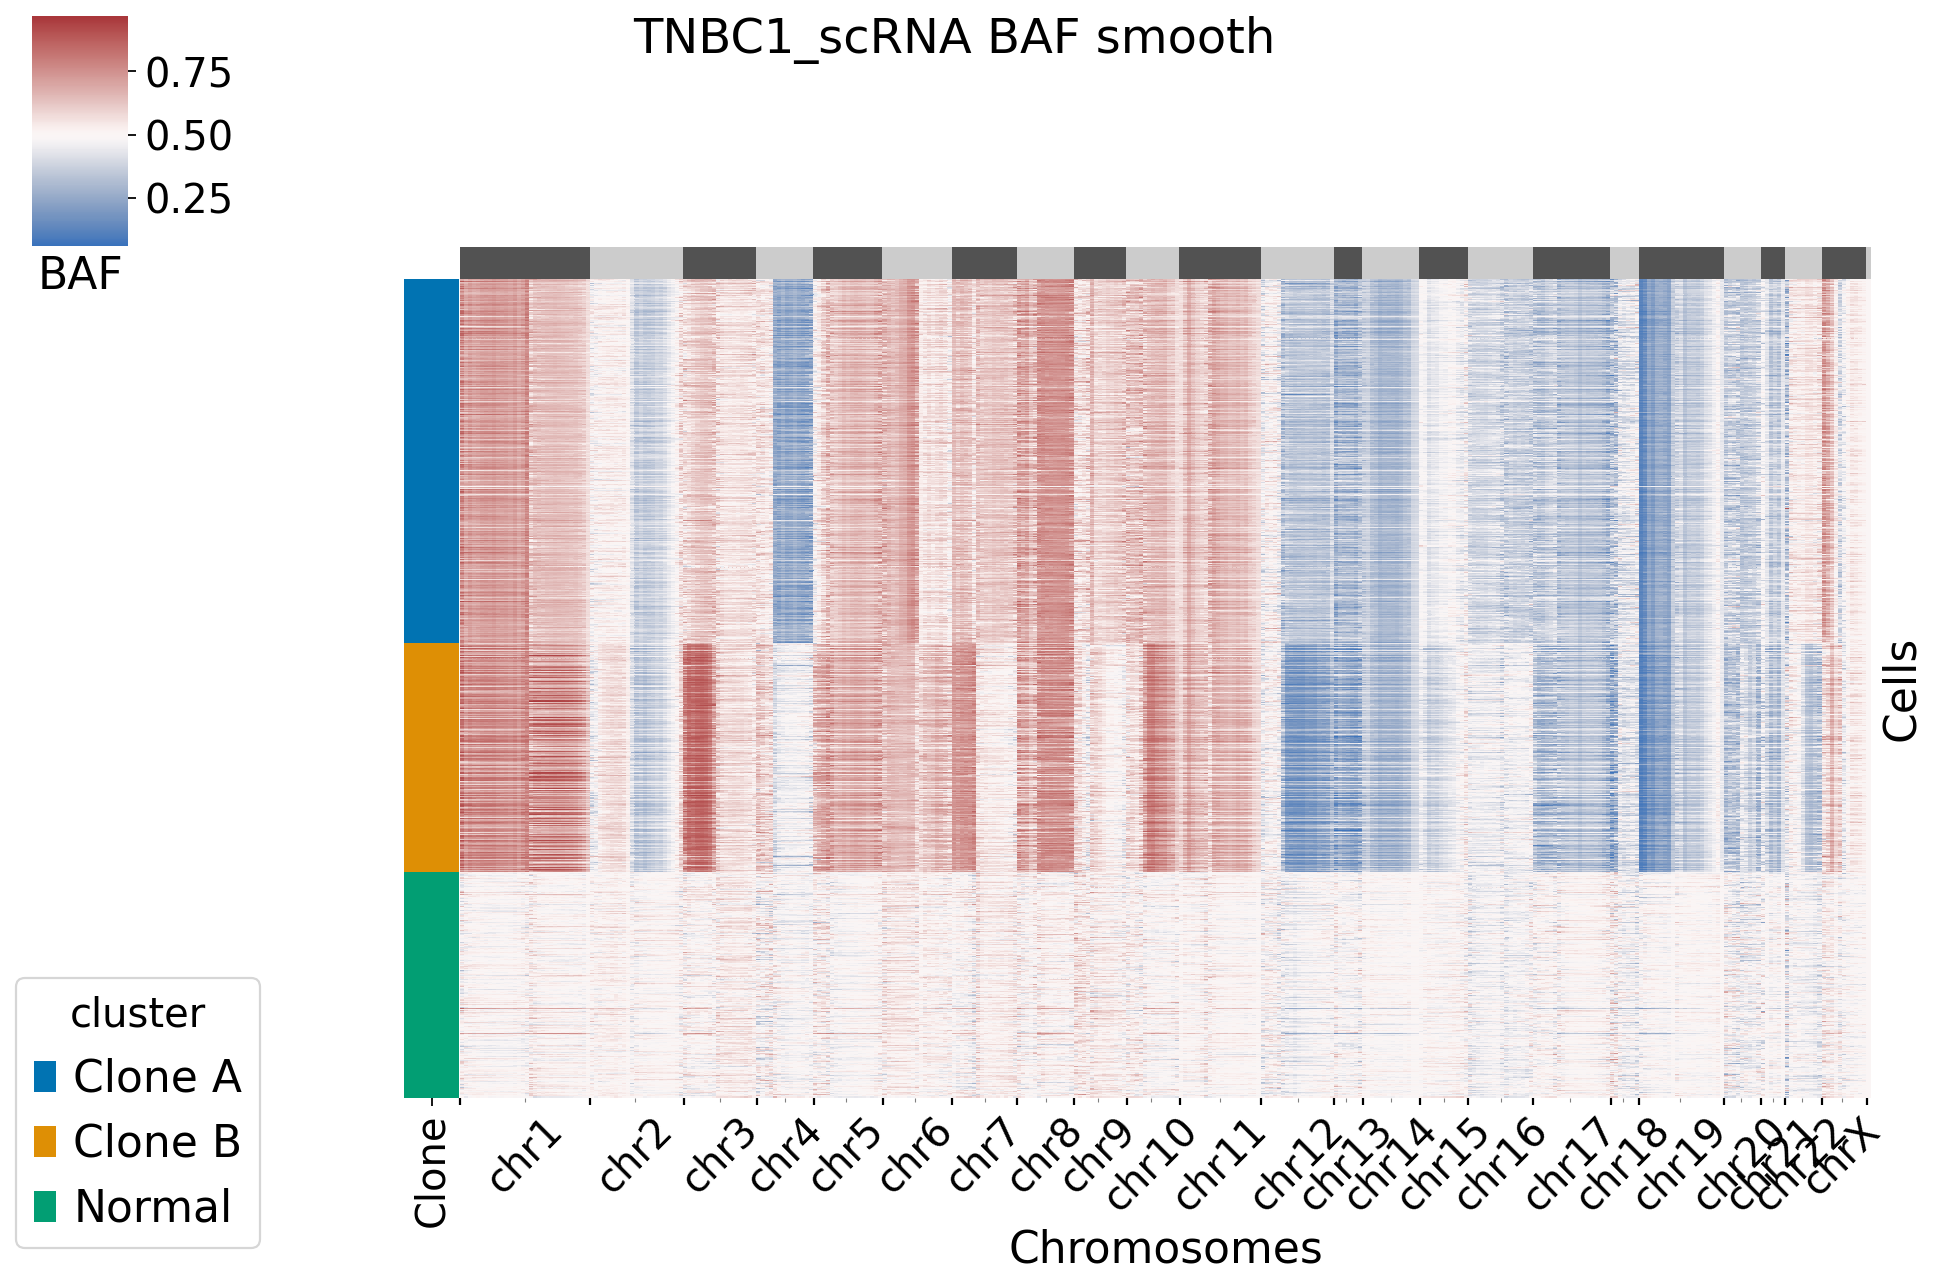

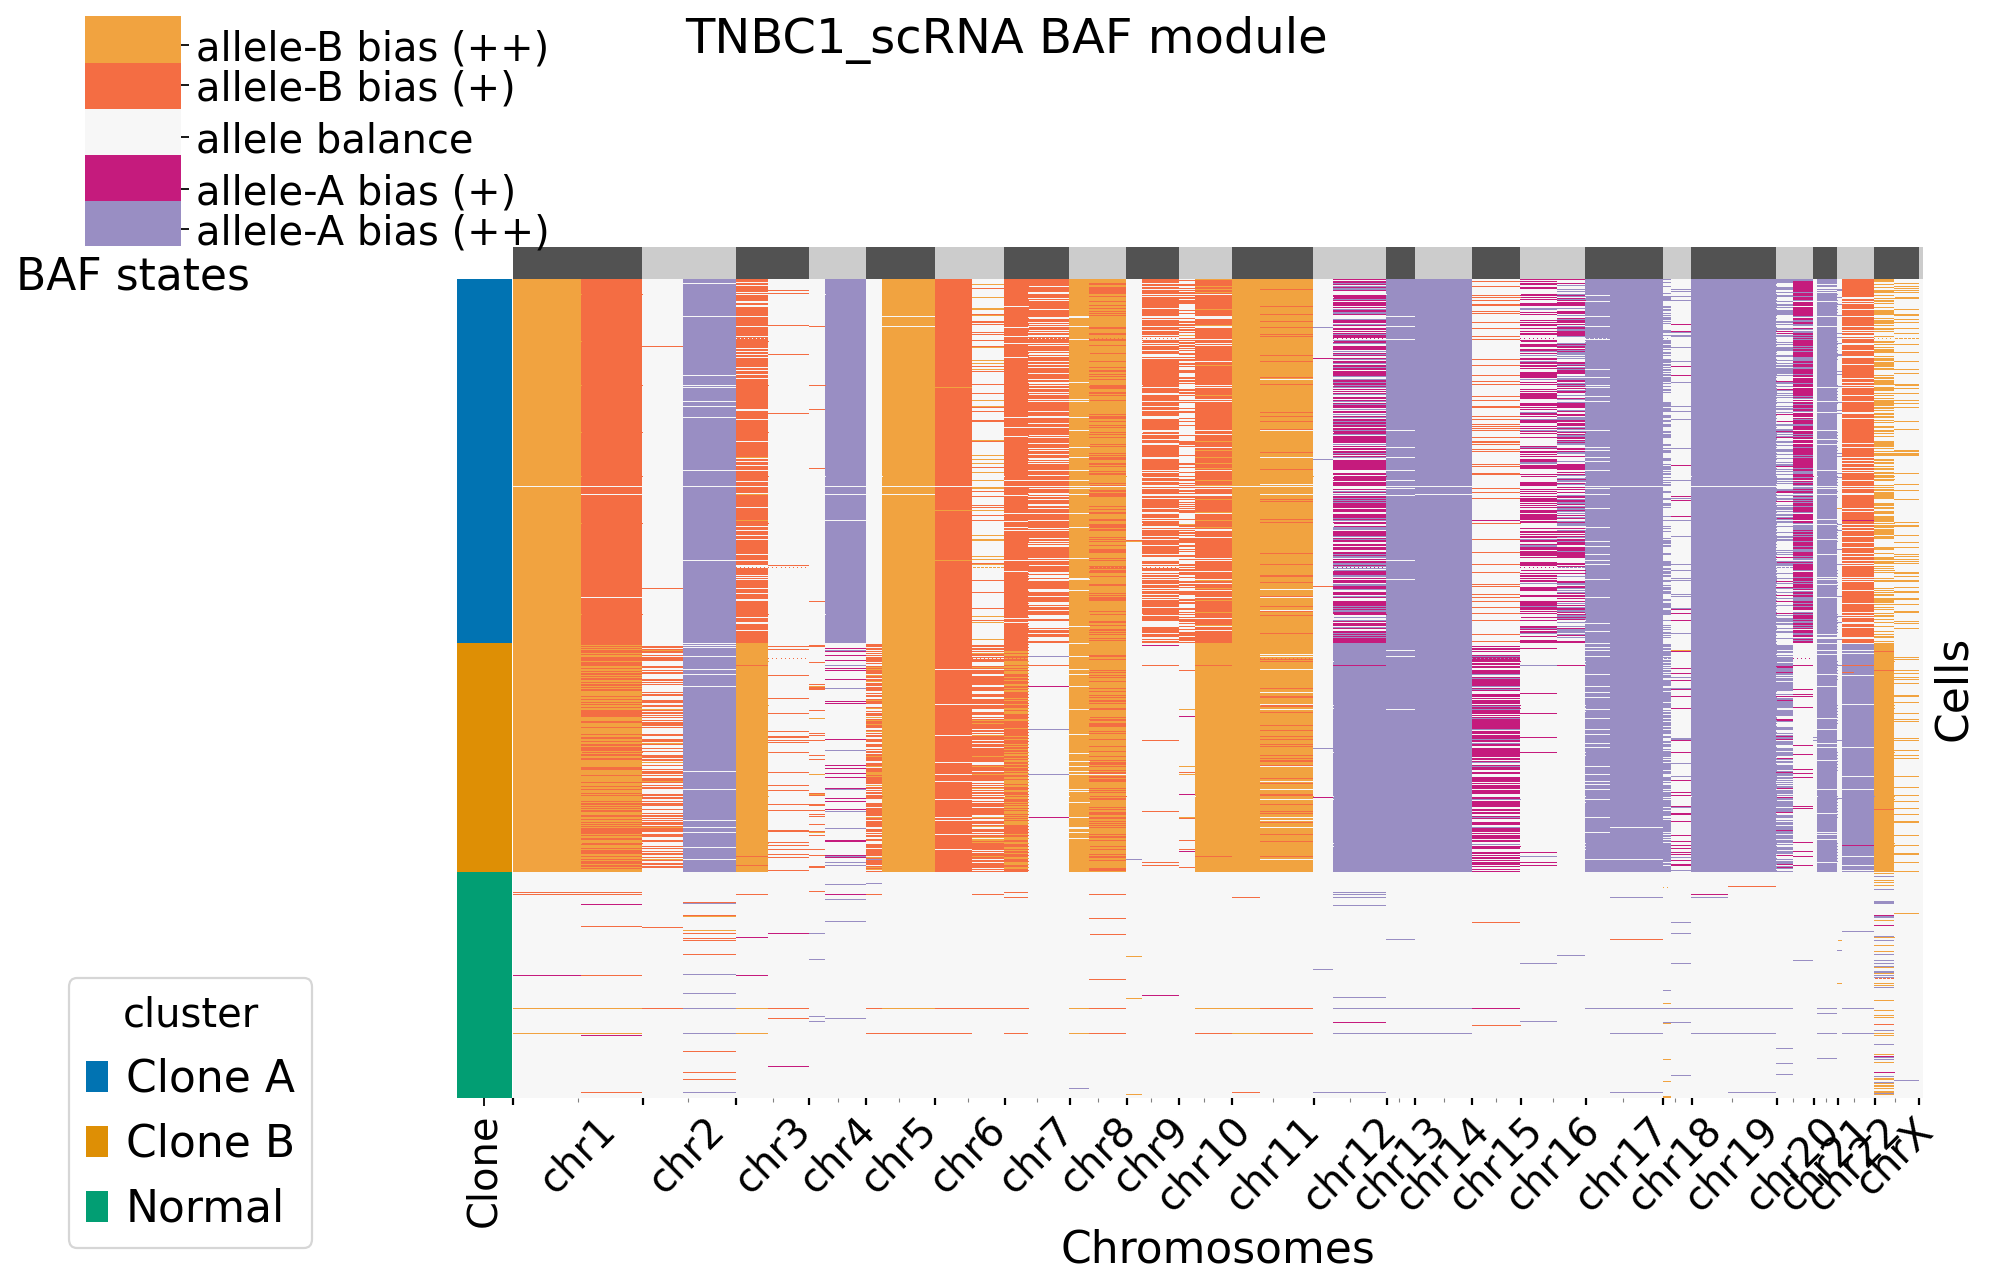

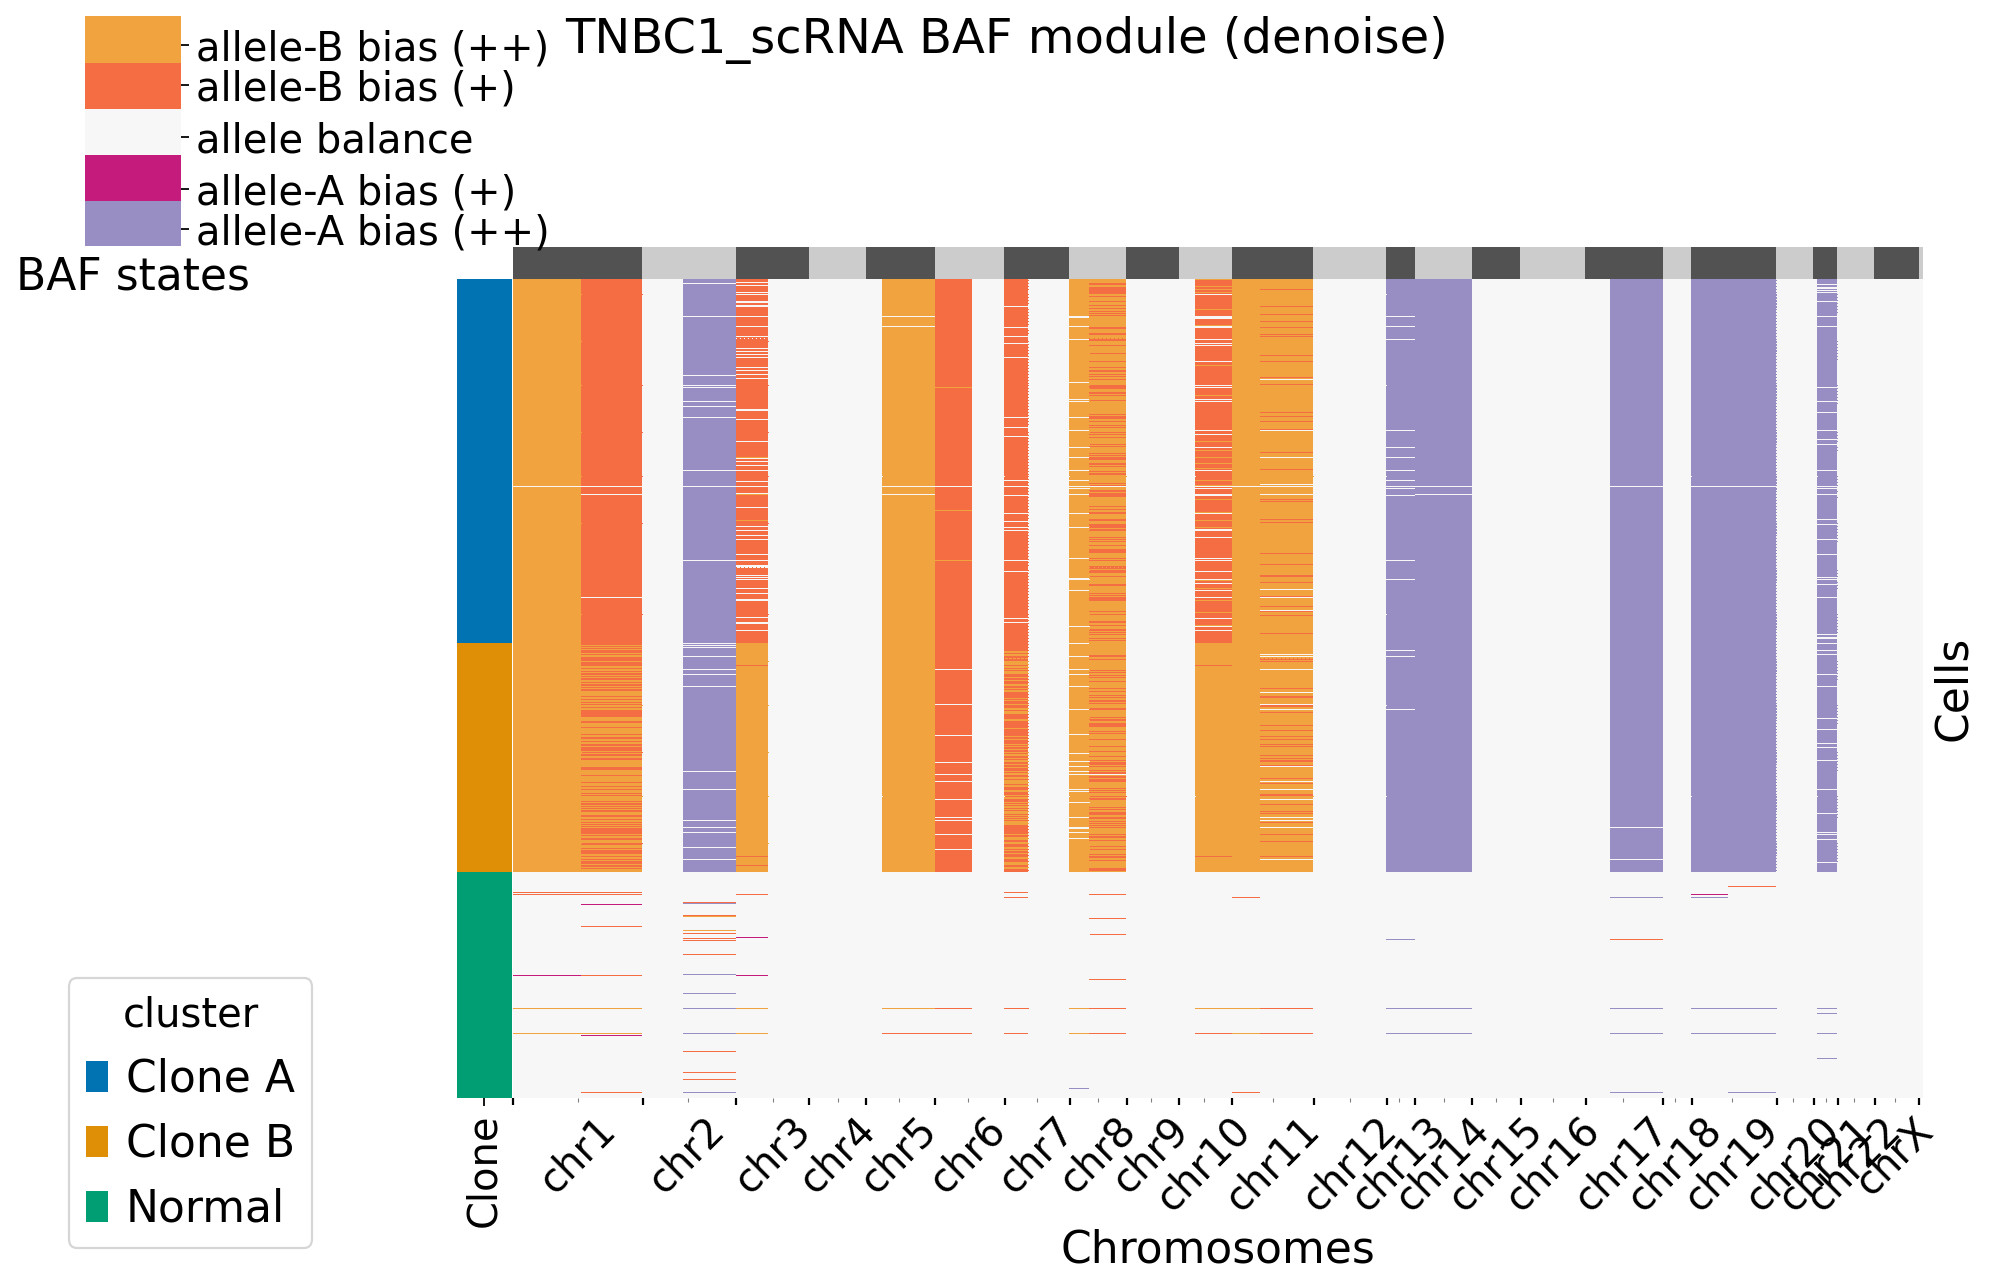

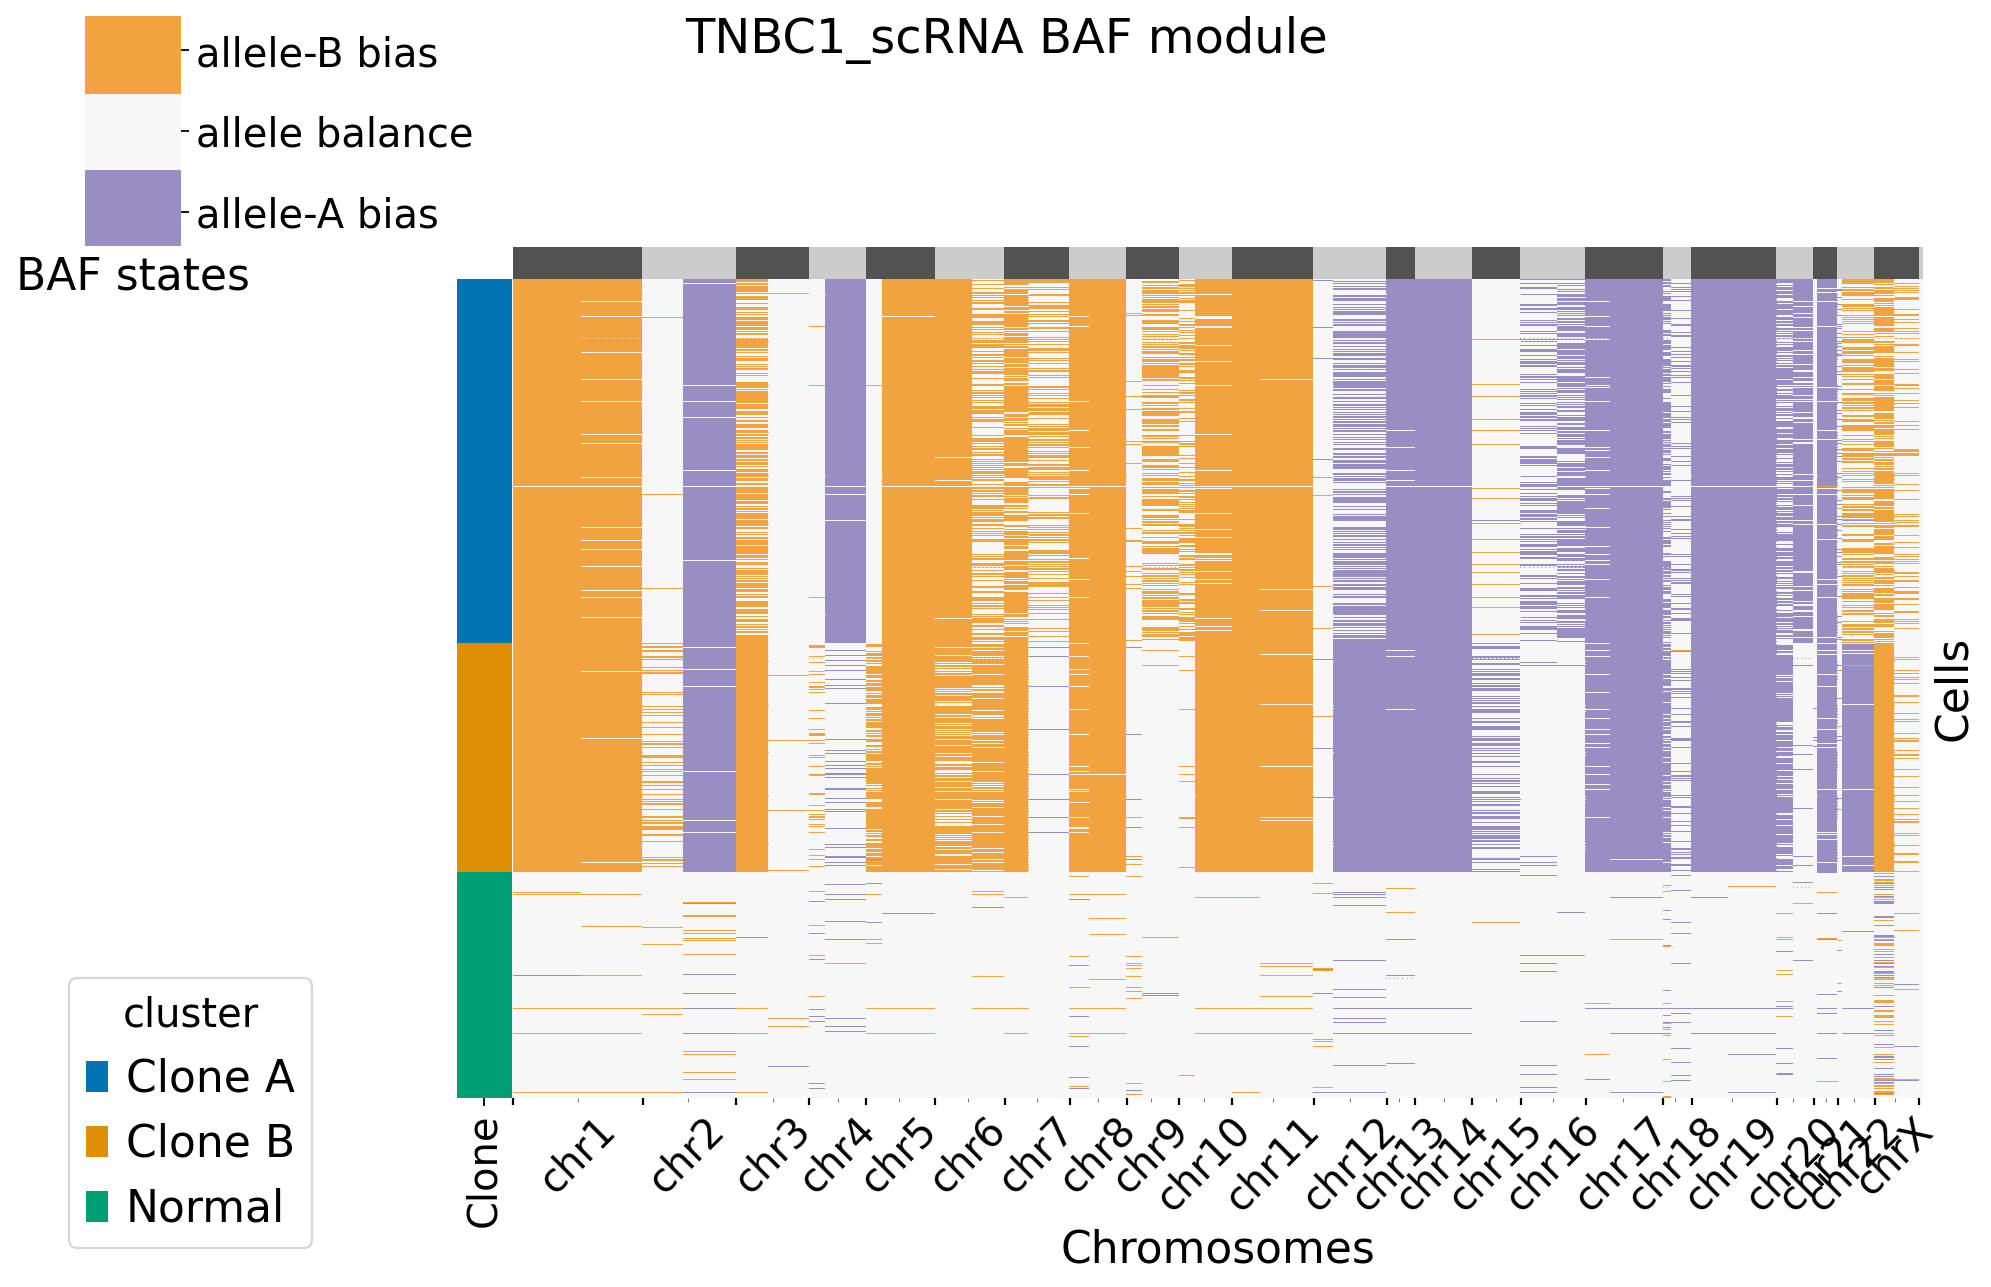

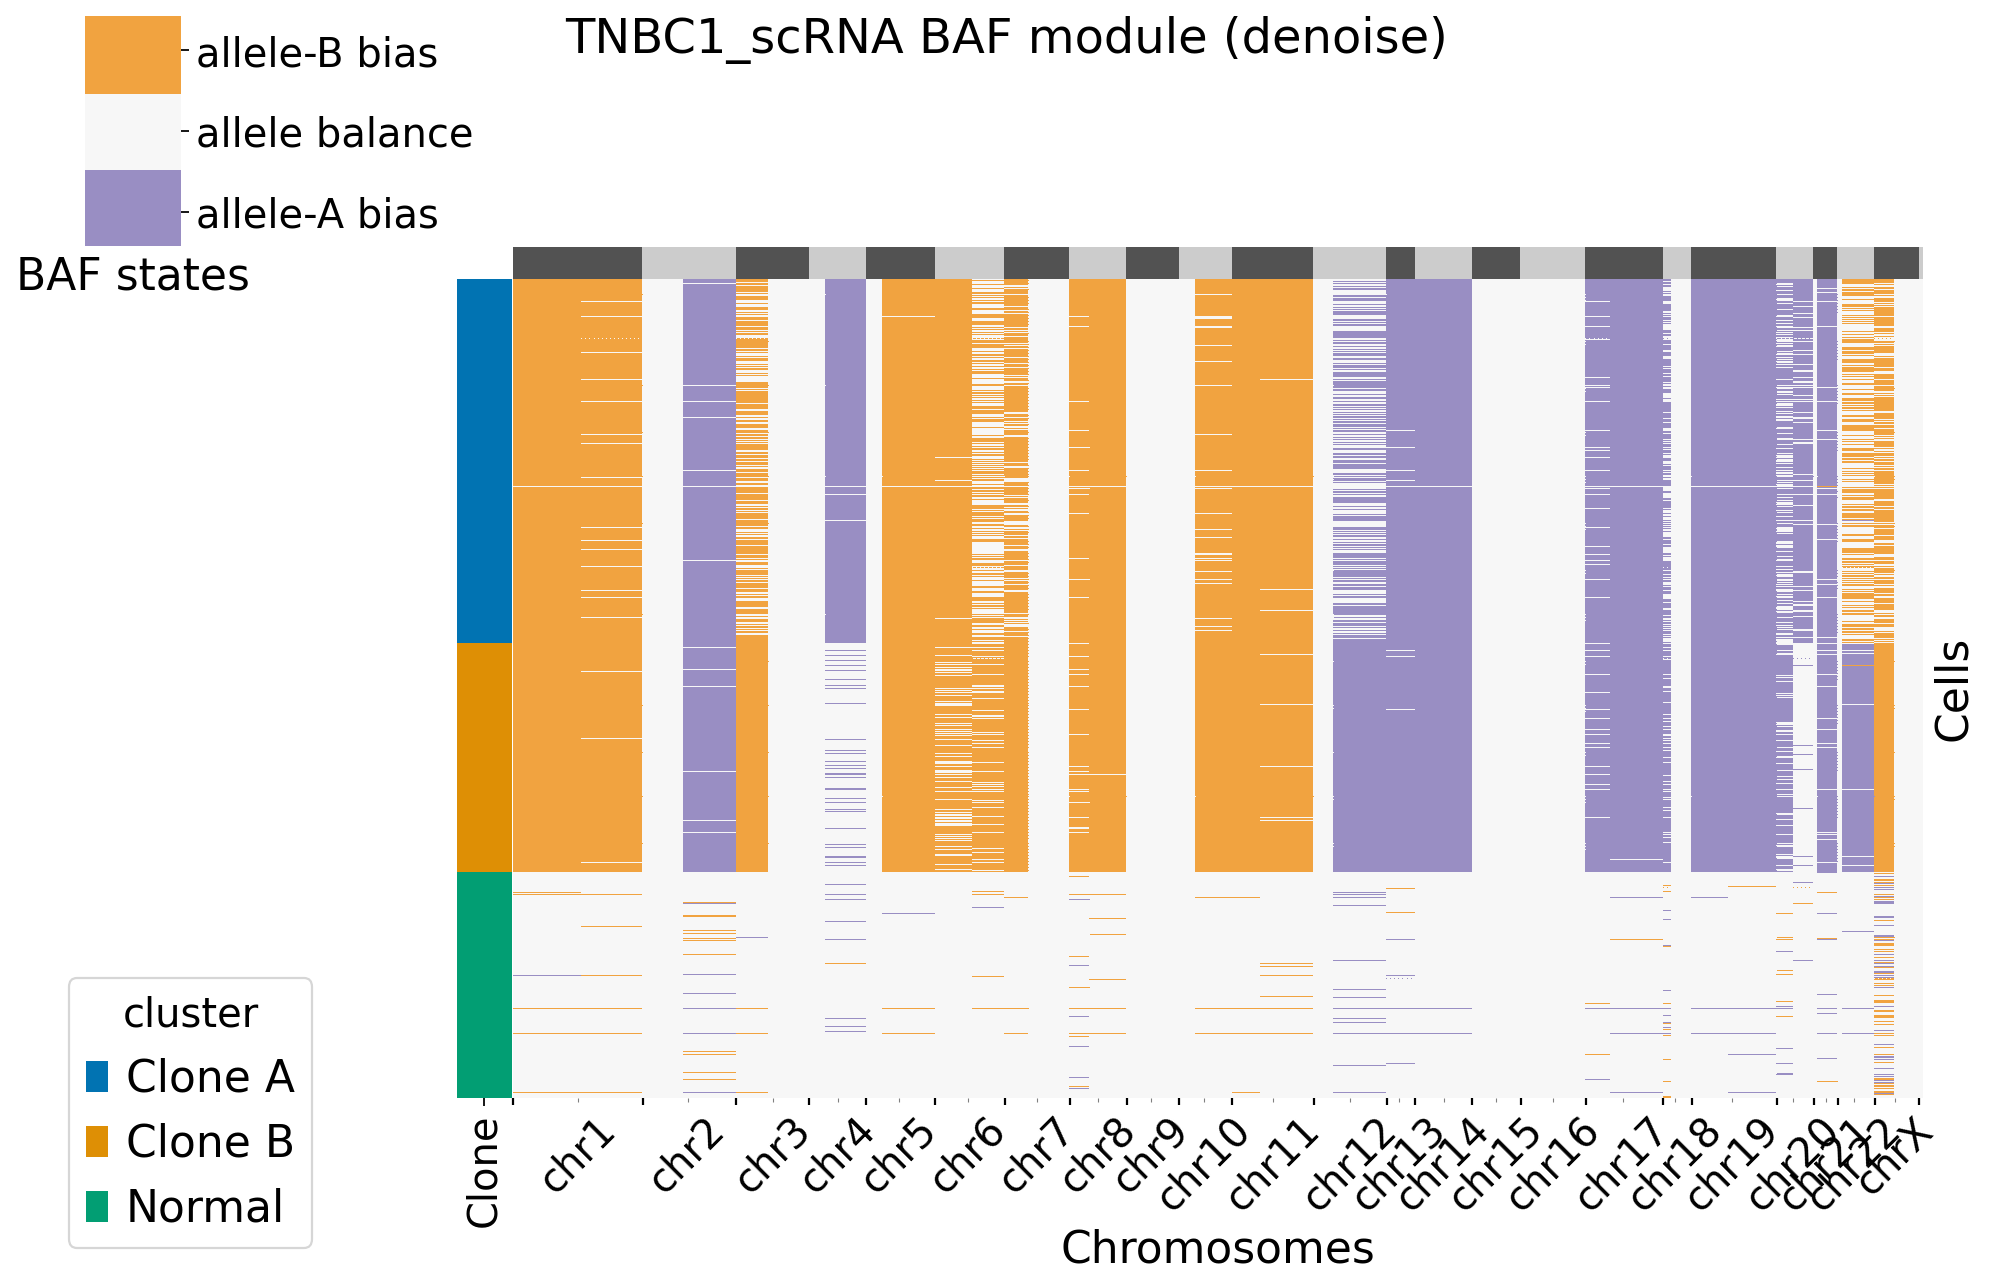

In [9]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = outdir
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

In [10]:
BAF_merge_Xdata

AnnData object with n_obs × n_vars = 1097 × 347
    obs: 'copykat.pred', 'cluster.pred', 'cluster', 'mit_clone_id', 'confident', 'tumor', 'copykat'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt', 'ref_BAF_phased'
    uns: 'local_phasing_key', 'local_phasing_len'
    layers: 'ad_bin_softcnt', 'ad_bin', 'dp_bin', 'ad_bin_softcnt_phased', 'ad_bin_phased', 'BAF', 'BAF_phased', 'fill_BAF_phased', 'BAF_phased_KNN', 'BAF_phased_KNN_WMA', 'BAF_phased_WMA', 'bin_phased_BAF_specific_center_emm_prob_log', 'bin_phased_BAF_specific_center_emm_prob_log_KNN', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx_log', 'add_posterior_mtx', 'denoised_add_posterior_mtx', 'denoised_posterior_mtx'
    obsp: 'connectivities_expr'
    varp: 'WMA_connect'

In [11]:
BAF_merge_Xdata.layers["posterior_mtx"].shape

(1097, 347, 5)

The final step anndata stored in  `outdir/data/BAF_merge_Xdata_KNN_HMM_post.h5ad` and users can get the CNV indentification in layer `posterior_mtx`.

Before combine, We checked the dimensions of RDR module and BAF module to make sure they are in same dimensions.

In [12]:
RDR_Xdata.var

GeneName           GeneID chr      start       stop arm chr_arm    band  \
26        HES4  ENSG00000188290   1     998962    1000172   p      1p  p36.33   
27       ISG15  ENSG00000187608   1    1001138    1014541   p      1p  p36.33   
38     TNFRSF4  ENSG00000186827   1    1211326    1214138   p      1p  p36.33   
39        SDF4  ENSG00000078808   1    1216908    1232031   p      1p  p36.33   
43      UBE2J2  ENSG00000160087   1    1253909    1273885   p      1p  p36.33   
...        ...              ...  ..        ...        ...  ..     ...     ...   
33348     MPP1  ENSG00000130830   X  154778684  154821007   q      Xq     q28   
33350       F8  ENSG00000185010   X  154835788  155026940   q      Xq     q28   
33353   FUNDC2  ENSG00000165775   X  155025980  155060303   q      Xq     q28   
33355    MTCP1  ENSG00000214827   X  155061622  155147937   q      Xq     q28   
33357     VBP1  ENSG00000155959   X  155197007  155239817   q      Xq     q28   

        ref_avg  dispersion  gene_dispersion_bse  dispersion_capped  
26     0.611296    5.409898                  NaN           2.920260  
27     6.817276    3.253048                  NaN           2.920260  
38     0.637874    5.979831                  NaN           2.920260  
39     1.408638    0.223667                  NaN           0.223667  
43     0.624585    0.175076                  NaN           0.175076  
...         ...         ...                  ...                ...  
33348  1.614618    0.779464                  NaN           0.779464  
33350  0.554817    0.424299                  NaN           0.424299  
33353  0.860465    0.115477                  NaN           0.115477  
33355  0.873754    0.152878                  NaN           0.152878  
33357  0.750831    0.159337                  NaN           0.159337  

[6402 rows x 12 columns]

In [13]:
BAF_merge_Xdata.var

chr      start       stop arm chr_arm    band  gene1_stop bin_stop_arm  \
0       1      29554    2530245   p      1p  p36.33       31109            p   
100     1    2530064    8434838   p      1p  p36.32     2547460            p   
200     1    8805860   13179464   p      1p  p36.23     8807051            p   
300     1   13196330   18486126   p      1p  p36.21    13201409            p   
400     1   18631006   23838620   p      1p  p36.13    18748866            p   
...    ..        ...        ...  ..     ...     ...         ...          ...   
32996   X  109623700  128052398   q      Xq     q23   109625172            q   
33096   X  128323620  140772679   q      Xq     q25   128600468            q   
33196   X  140782405  153689010   q      Xq   q27.1   140784871            q   
33296   X  153688099  156016837   q      Xq     q28   153696593            q   
33372   Y    2786855   25733388   p      Yp   p11.2     2787699            q   

      bin_stop_chr_arm bin_stop_band  bin_idx  bin_idx_cum  \
0                   1p        p36.32        0            0   
100                 1p        p36.23        1            1   
200                 1p        p36.21        2            2   
300                 1p        p36.13        3            3   
400                 1p        p36.11        4            4   
...                ...           ...      ...          ...   
32996               Xq           q25        7          342   
33096               Xq         q27.1        8          343   
33196               Xq           q28        9          344   
33296               Xq           q28       10          345   
33372               Yq        q11.23        0          346   

                                            GeneName_lst  \
0      MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309....   
100    AL139246.5,TNFRSF14-AS1,TNFRSF14,AL139246.3,FA...   
200    AL357552.2,ENO1,ENO1-AS1,CA6,SLC2A7,SLC2A5,GPR...   
300    PRAMEF13,PRAMEF18,PRAMEF5,PRAMEF8,PRAMEF33,PRA...   
400    PAX7,TAS1R2,AL080251.1,ALDH4A1,IFFO2,UBR4,AL03...   
...                                                  ...   
32996  KCNE5,ACSL4,TMEM164,AMMECR1,RTL9,CHRDL1,PAK3,C...   
33096  AL442647.1,SMARCA1,OCRL,APLN,XPNPEP2,SASH3,ZDH...   
33196  CDR1,AL078639.1,AL451048.1,SPANXB1,AC234778.2,...   
33296  SLC6A8,BCAP31,ABCD1,U52111.1,PLXNB3,SRPK3,IDH3...   
33372  SRY,RPS4Y1,AC006157.1,ZFY,ZFY-AS1,LINC00278,TG...   

                                              GeneID_lst  bin_genes_cnt  \
0      ENSG00000243485,ENSG00000237613,ENSG0000018609...            818   
100    ENSG00000272449,ENSG00000238164,ENSG0000015787...            870   
200    ENSG00000228423,ENSG00000074800,ENSG0000023067...            809   
300    ENSG00000279169,ENSG00000279804,ENSG0000027060...            860   
400    ENSG00000009709,ENSG00000179002,ENSG0000025527...            756   
...                                                  ...            ...   
32996  ENSG00000176076,ENSG00000068366,ENSG0000015760...            731   
33096  ENSG00000225689,ENSG00000102038,ENSG0000012212...            743   
33196  ENSG00000184258,ENSG00000281508,ENSG0000022926...            774   
33296  ENSG00000130821,ENSG00000185825,ENSG0000010198...            513   
33372  ENSG00000184895,ENSG00000129824,ENSG0000027884...            718   

       ref_BAF_phased  
0            0.507143  
100          0.517442  
200          0.520401  
300          0.534310  
400          0.553076  
...               ...  
32996        0.501661  
33096        0.483389  
33196        0.495017  
33296        0.503322  
33372        0.500000  

[347 rows x 16 columns]

In [14]:
flag = ~(BAF_merge_Xdata.var["chr"] == "Y")

BAF_merge_Xdata = BAF_merge_Xdata[:, flag]

## Combine module

Similarly, by calling the config method `xclone.XCloneConfig()`, users can create an instance of the `XCloneConfig` class in the `module` of "Combine" to set data-specific configures for Combine module.

Set the output directory by specifying `outdir`.

Users can decide to plot the main figures in each module or not by setting `xclone_plot`, True or False. If True, can also select cell annotation term `plot_cell_anno_key` for plotting cells by clusters. If `plot_cell_anno_key` is not specified,
default `cell_anno_key= "cell_type"` will be used.

For plotting functions in combine moudle, users can set bool variable `merge_loss` and  `merge_loh` to see if they want to merge allele-specific copy loss/loh states. For more setting in XClone plotting, refer to plotting page.
Here in TNBC1 datasets, we merge both  the allele-specific copy loss and loh states.

Users can set `BAF_denoise = True` to combine denoised results from BAF module with RDR module.

Before running the Combine moudle, users can use `xconfig.display()` to print all configurations used in Combine module for previewing and logging.

Users can run the analysis on your input data by calling the `run_combine` method by specifying the `RDR_Xdata`, `BAF_merge_Xdata` and `config_file`. 
If no custmoised config file is used, XClone will load the default config file.

Here shows the example of  TNBC1 Combine module.

Trying to set attribute `.var` of view, copying.


Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/tutorials
_plot_suffix                   
_start                         1679730925.6343658
_vector_friendly               True
cell_anno_key                  cluster.pred
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
dataset_name                   TNBC1_scRNA
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
merge_loh                      True
merge_loss                     True
module                         Combine
outdir                         /storage/yhhuang/users/rthuang/xclone/tutorials
plot_cell_anno_key             cluster
plot_suffix                    
ref

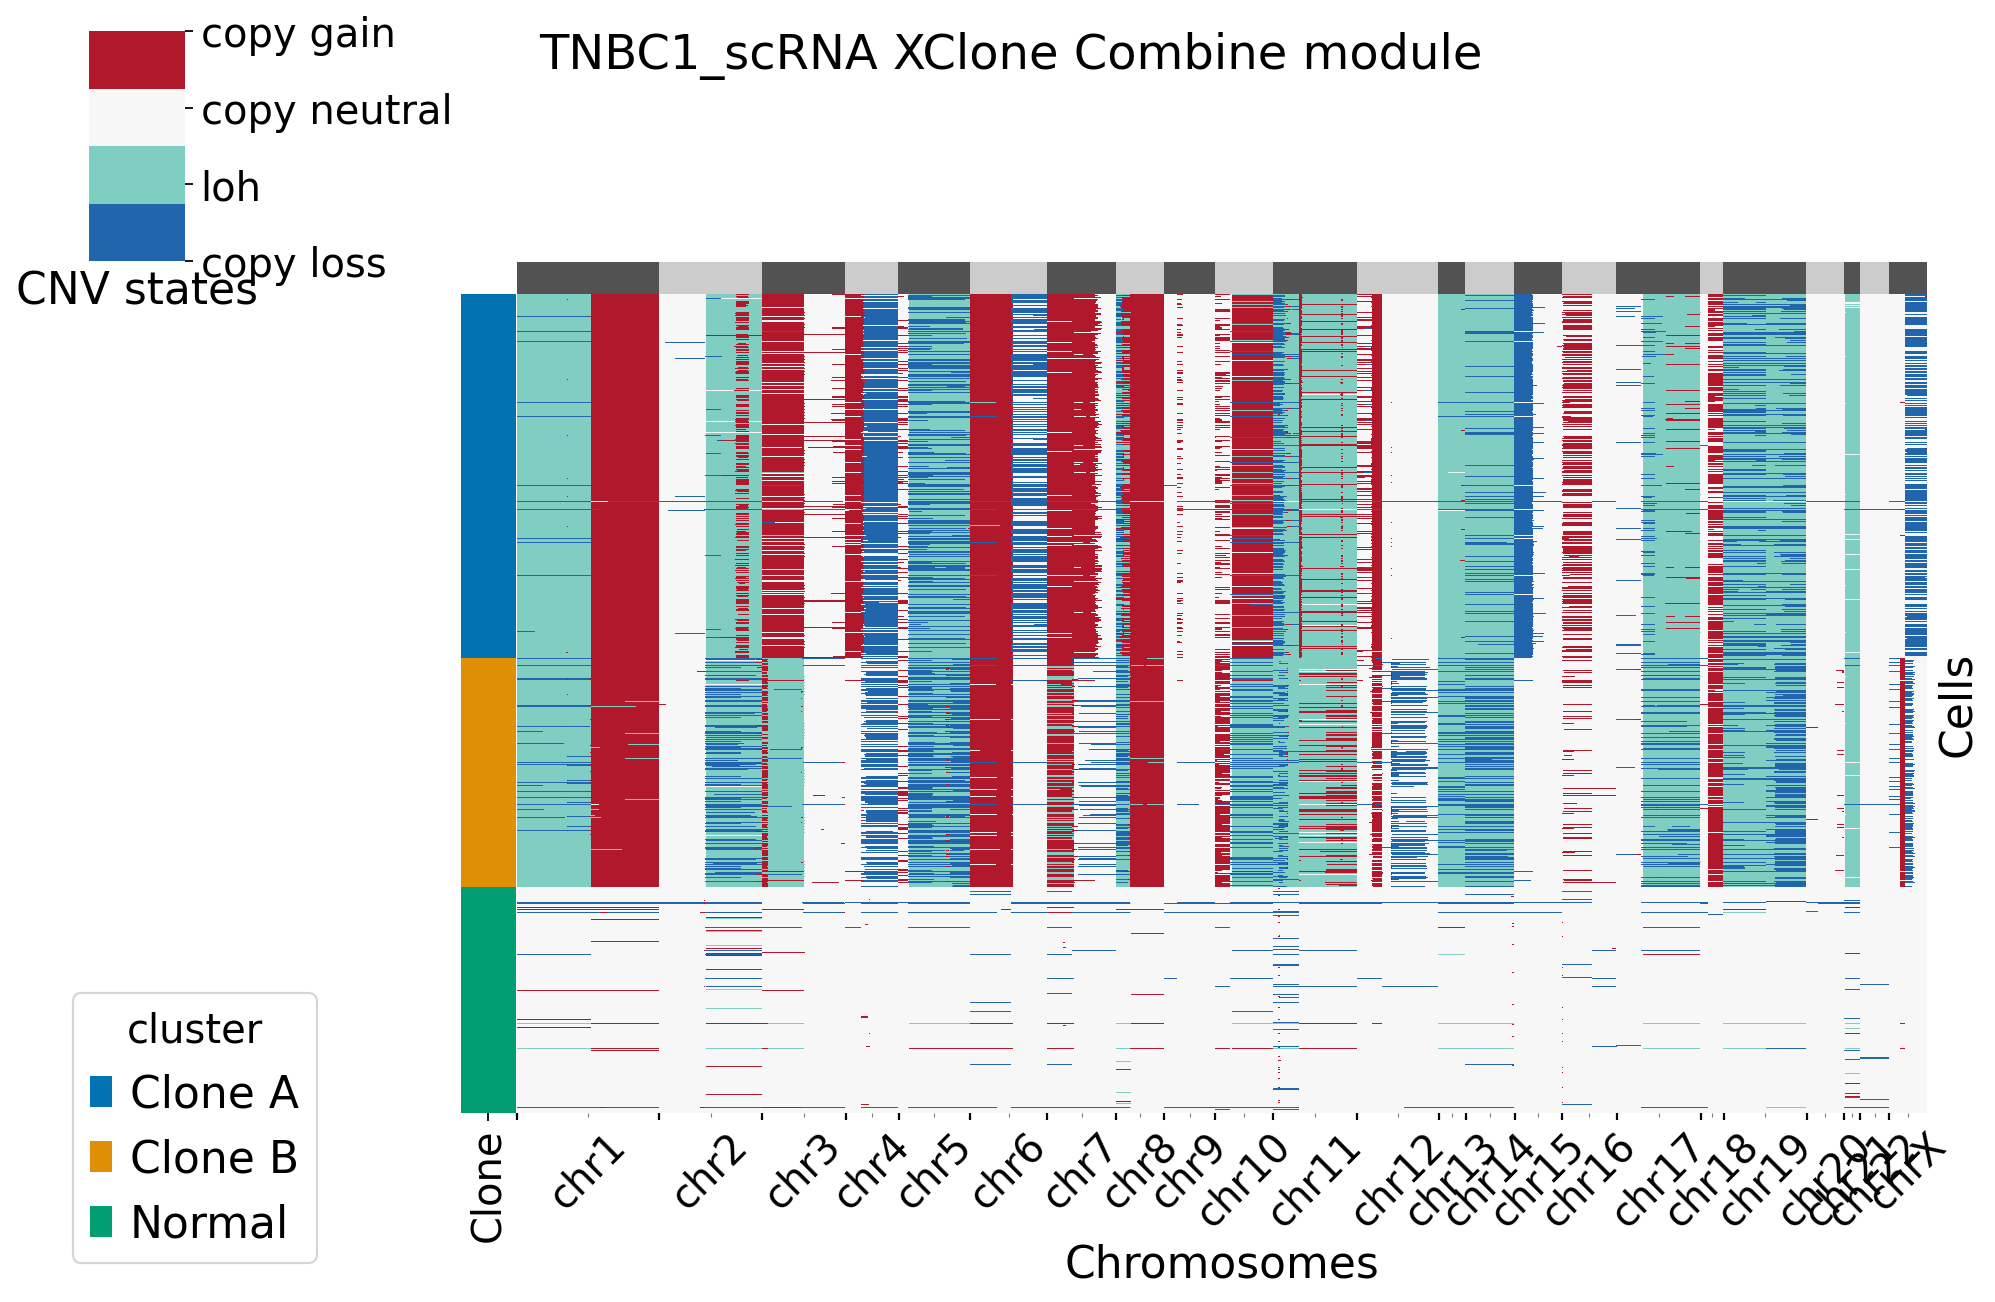

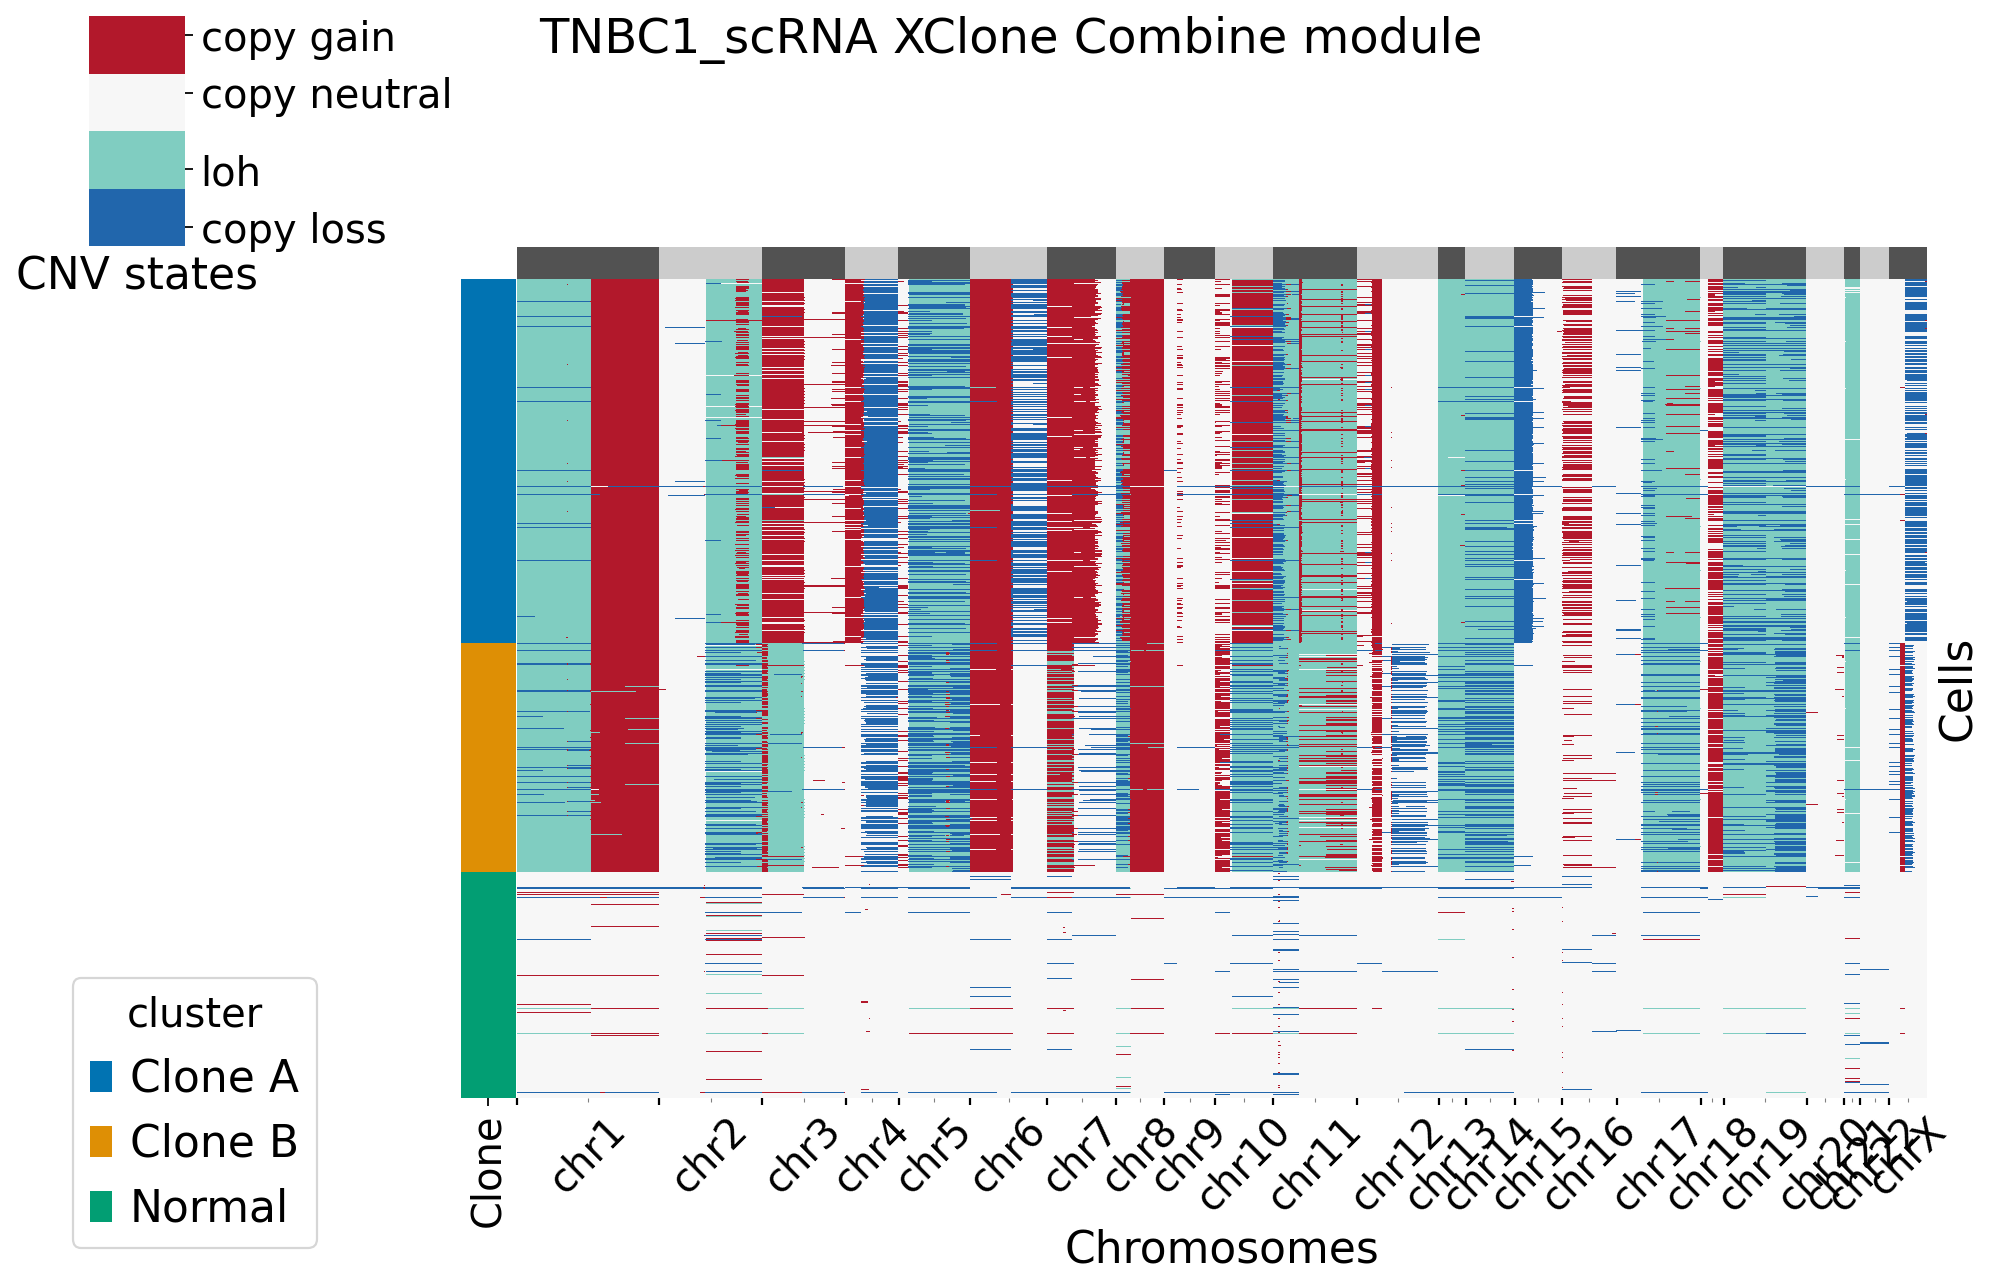

AnnData object with n_obs × n_vars = 1097 × 6402
    obs: 'copykat.pred', 'cluster.pred', 'cluster', 'mit_clone_id', 'confident', 'tumor', 'copykat', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped', 'gene_index'
    uns: 'data_mode', 'data_notes', 'genome_mode', 'log', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors', 'chr_dict', 'guide_CNV_chrs_use_layers', 'guide_CNV_chrs_use_anno_key', 'ref_log_expression_brk', 'group_genes', 'CNV_ratio', 'Logliklihood'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected', 'WMA_smoothed', 'RDR_smooth', 'emm_prob_log', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx_log', 'BAF_extend_post_prob', 'combine_base_prob', 'corrected_prob', 'prob1_merge', 'plot_prob_merge1', 'plot_prob_merge2', 'plot_prob_merge3', 'plot_pro

In [15]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = outdir

xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"
xconfig.BAF_denoise = True

xconfig.display()

xclone.model.run_combine(RDR_Xdata,
                         BAF_merge_Xdata,
                         verbose = True,
                         run_verbose = True,
                         config_file = xconfig)

The final step anndata stored in  `outdir/data/combined_final.h5ad` and users can get the CNV indentification in layer `corrected_prob` and `prob1_merge`.